# Predicting Player Value based on basic stats

## Usual Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data

And I'm only taking the necessary columns

In [2]:
df = pd.read_csv("playerdata.csv")
df = df[['Name', 'Market Value', 'Age', 'Goals', 'Assists']]

df.head(9)

,Name,Market Value,Age,Goals,Assists
0,Erling Haaland,200000000,24,14,0
1,Vinicius Junior,200000000,24,5,7
2,Jude Bellingham,180000000,21,1,2
3,Kylian Mbappé,180000000,25,8,1
4,Lamine Yamal,150000000,17,5,6
5,Phil Foden,150000000,24,1,2
6,Bukayo Saka,140000000,23,3,7
7,Florian Wirtz,130000000,21,7,3
8,Jamal Musiala,130000000,21,4,6


### Plotting the Data

Here I'm only plotting the age-to-value graph jsut for example
In the regression model goals and assists are also a factor

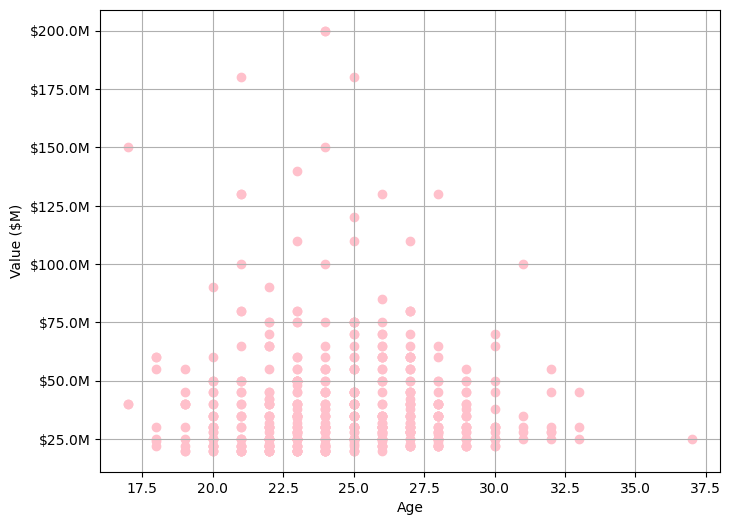

In [3]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Market Value'],  color='pink')

# Format y-axis to show values in millions with dollar sign
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: '${:1.1f}M'.format(x/1000000)))

plt.xlabel("Age")
plt.ylabel("Value ($M)")
plt.grid(True)
plt.show()

### Data Splitting (70/30) (train/test)

In [4]:
mask = np.random.rand(len(df)) < 0.7
train_data = df[mask]
test_data = df[~mask]


### Actual Work

In [5]:
from sklearn import linear_model

regression_model = linear_model.LinearRegression()

train_x = np.asanyarray(train_data[['Age','Goals', 'Assists']])
train_y = np.asanyarray(train_data[['Market Value']])

regression_model.fit(train_x, train_y)

print ('Coefficients: ', regression_model.coef_)
print ('Intercept: ',regression_model.intercept_)

Coefficients:  [[-492641.30166899 2373494.40618019 3439676.71555746]]
Intercept:  [44873870.62925839]


In [6]:
test_x = np.asanyarray(test_data[['Age','Goals', 'Assists']])
test_y = np.asanyarray(test_data[['Market Value']])

test_y_prediction= regression_model.predict(test_x)

print("Residual sum of squares: %.2f"
      % np.mean((test_y_prediction - test_y) ** 2))

print('Variance score: %.2f' % regression_model.score(test_x, test_y))

Residual sum of squares: 433022822452494.50
Variance score: 0.12
